In [1]:
import cv2
import numpy as np
from pathlib import Path
from PIL import Image

import sys; sys.path.append('..')
from continuous_landmarks.dataset.transforms import (
    ComposeWithPoints, AlignImageWithPoints, ResizeWithPoints
)
from continuous_landmarks.dataset import face300w

In [2]:
def draw_points(im, points):
    im_arr = np.array(im)

    for p in points:
        cv2.circle(im_arr, p.astype(int), 3, (0, 255, 255), -1)

    return Image.fromarray(im_arr)

# 300-W dataset

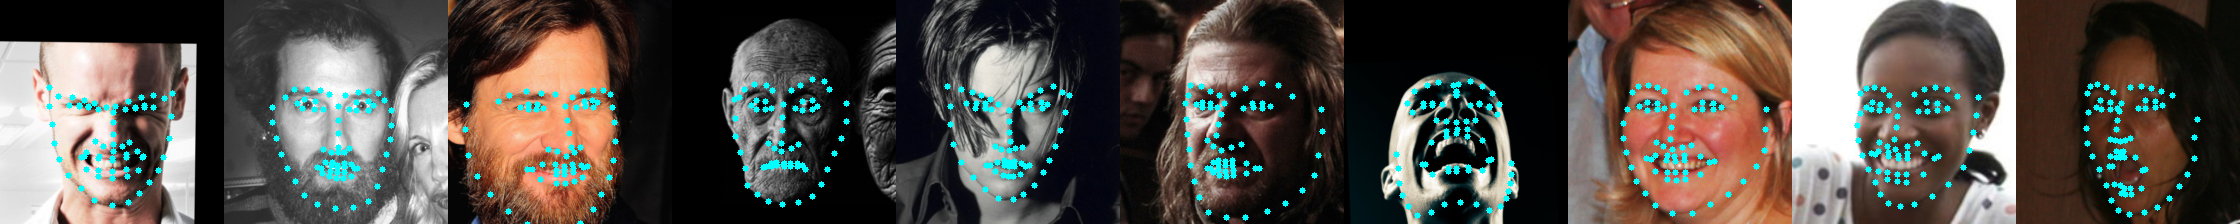

In [3]:
ds300w = face300w.Face300WDataset(
    Path('../data/300W/'),
    ComposeWithPoints([
        AlignImageWithPoints(face300w.get_eyes_mouth),
        ResizeWithPoints(224),
    ])
)

Image.fromarray(np.hstack([draw_points(*ds300w[i]) for i in range(10)]))

# Fake It Till You Make It dataset

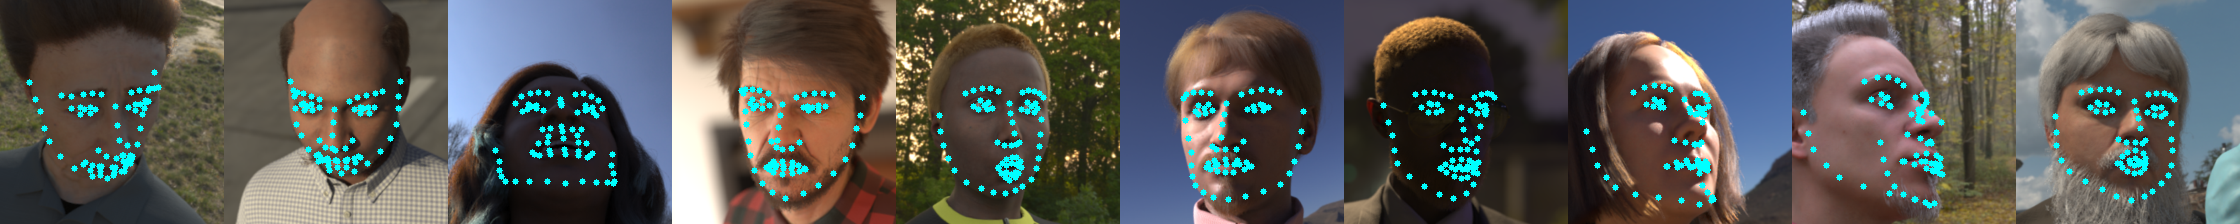

In [4]:
from continuous_landmarks.dataset import fitymi

ds_fitymi = fitymi.FITYMIDataset(
    Path('../data/FITYMI/'),
    ComposeWithPoints([
        AlignImageWithPoints(fitymi.get_eyes_mouth),
        ResizeWithPoints(224),
    ])
)

Image.fromarray(np.hstack([draw_points(*ds_fitymi[i]) for i in range(10)]))